<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src = "daisy2.JPG">

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
import PIL # image library of python, it shows images
            #pip install pillow

In [8]:
import cv2 # computer vision library
            #pip install opencv-python

In [9]:
import os

In [10]:
import matplotlib.pyplot as plt
import numpy as np

<h3 style='color:purple'>Load flowers dataset</h3>

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [17]:
data_dir = tf.keras.utils.get_file("flower_photos", origin = dataset_url, cache_dir ="C:/Users/Owner", untar = True)

In [18]:
data_dir

'C:/Users/Owner\\datasets\\flower_photos'

In [19]:
# we need pathlib module to make easier going each images and read them into numpy array, it changes path to windows path object
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Owner/datasets/flower_photos')

In [21]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [22]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

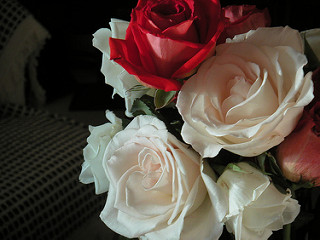

In [23]:
PIL.Image.open(str(roses[1]))

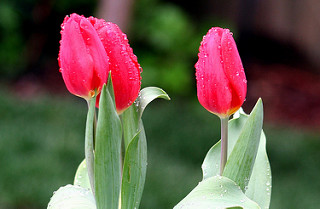

In [25]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [27]:
#set a dictionary up to use different image folders to use in later in modelling

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_images_dict["daisy"][0]

WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [34]:
str(flowers_images_dict["daisy"][0])

'C:\\Users\\Owner\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [30]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [31]:
# we will use cv2 mdule to read image file into opencv object

In [35]:
# we will use cv2 mdule to read image file into opencv object
img = cv2.imread(str(flowers_images_dict["roses"][0])) # opencv expects string path

In [36]:
img # open cv read the images from disk and converts them to 3-dim array

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [38]:
img.shape # 3 dim: x,y,rgb value

(240, 179, 3)

In [39]:
#resizing images: because images are in different shape. for training shape needs to be same

In [40]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [43]:
X, y = [] , []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [44]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [46]:
y[:5]

array([0, 0, 0, 0, 0])

In [47]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [45]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
len(X_train)

2752

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [50]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [51]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
  
    layers.Flatten(), #dense layer accept s,ngle dim array 
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1) 

86/86 [==============================] - 91s 804ms/step - loss: 1.4352 - accuracy: 0.3888


In [52]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 19s 206ms/step - loss: 1.2290 - accuracy: 0.4673


[1.2290458679199219, 0.4673202633857727]

**if  train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [53]:
predictions = model.predict(X_test_scaled)
predictions
# on the dense layer we use linear AF-default, because of it there are values, not probs
# to change it into a prob score, use softmax function

29/29 [==============================] - 23s 251ms/step


array([[-0.26483542,  0.57770544, -0.50769794, -0.9730733 ,  0.13002357],
       [ 2.166949  , -1.2495136 , -2.527823  , -0.59079266,  2.40532   ],
       [-0.536882  ,  0.07177394,  0.22554493,  0.12463201,  0.01847938],
       ...,
       [-0.13142967, -0.41236728, -0.20315051,  1.3499438 ,  0.40426955],
       [ 0.49092698, -0.29918876, -0.46975267, -0.89290494,  0.30332053],
       [ 0.3973834 , -1.2892663 , -0.32777205,  1.4985952 ,  1.2000337 ]],
      dtype=float32)

In [54]:
score = tf.nn.softmax(predictions[0])

In [55]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.16438377, 0.38174185, 0.12893923, 0.08096086, 0.24397425],
      dtype=float32)>

In [56]:
np.argmax(score)

1

In [57]:
y_test[0]

1

In [ ]:
#low accuracy because of overfitting, use data aug to address overfitting

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [ ]:
#one of transformation api: RandomZoom 
#produce more samples: model robuust: prevent overfitting: it can genarilize

In [64]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    
])

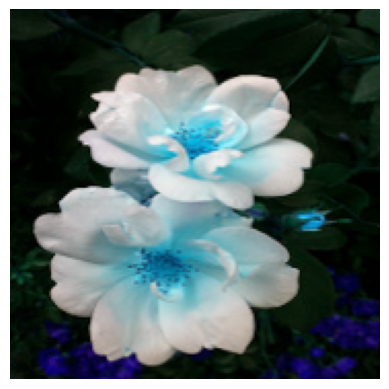

In [65]:
plt.axis("off")
plt.imshow(X[0])

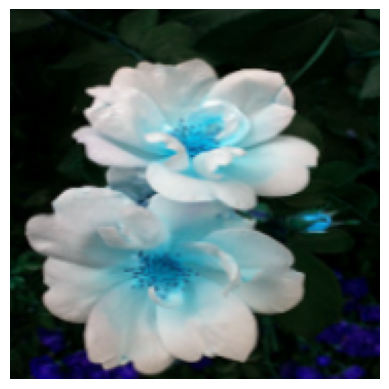

In [68]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [69]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
    
])

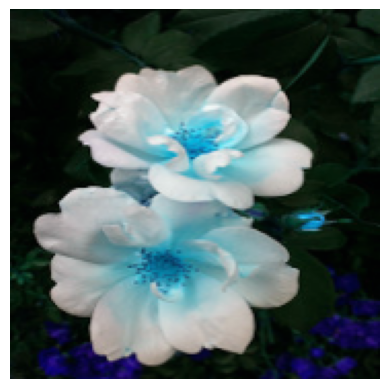

In [70]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

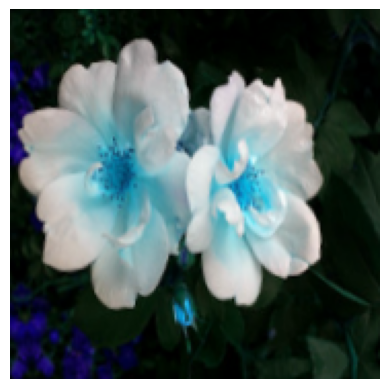

In [71]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
    
])
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [73]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape= (img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
])

NameError: name 'img_height' is not defined

In [72]:
num_classes = 5

model = Sequential([
    data_augmentation,#f,rst layer: in the pipeline the 1st layer is doing aug producing new samples
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
  
    layers.Flatten(), 
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1) 

86/86 [==============================] - 114s 1s/step - loss: 1.2819 - accuracy: 0.4335
